In [1]:
# Часть 2 Работа с библиотекой Pandas
# Провирим установку библиотеки pandas 
try:
    import pandas as pd
    print("Библиотека pandas установлена")
except ImportError:
    print("Библиотека pandas не установлена")

Библиотека pandas установлена


In [2]:
url = "https://www.geos.ed.ac.uk/~weather/jcmb_ws/JCMB_2015_May.csv" # Загружаем файл в DataFrame из источника
df = pd.read_csv(url)
print(f"Наименования столбцов:") # выводим названия столбцов
print('\n'.join(df.columns))
# Переименуем столбцы 
df.rename(columns={
    'date-time': 'date_time',
    'atmospheric pressure (mBar)': 'a_press',
    'rainfall (mm)': 'rainfall',
    'wind speed (m/s)': 'wind_speed',
    'wind direction (degrees)': 'wind_dir',
    'surface temperature (C)':'temp_',
    'relative humidity (%)': 'humidity',
    'solar flux (Kw/m2)':'solar_flux',
    'battery (V)':'bat_v'
}, inplace=True)
print(f"Наименование столбцов после редактирования:") # выводим наименования после редактирования столбцов
print('\n'.join(df.columns))

Наименования столбцов:
date-time
atmospheric pressure (mBar)
rainfall (mm)
wind speed (m/s)
wind direction (degrees)
surface temperature (C)
relative humidity (%)
solar flux (Kw/m2)
battery (V)
Наименование столбцов после редактирования:
date_time
a_press
rainfall
wind_speed
wind_dir
temp_
humidity
solar_flux
bat_v


In [3]:
df.head(1000).to_csv('data1000_rows.csv') # Сохраняем первые 1000 строк DataFrame в CSV-файл
new_df = pd.read_csv('data1000_rows.csv') # Загружаем в DataFrame сохраненный CSV-файл
print("Первые 20 записей:") # Выводим первые 20 записей
print(new_df.head(20))

Первые 20 записей:
    Unnamed: 0         date_time  a_press  rainfall  wind_speed  wind_dir  \
0            0  2015/05/01 00:01     1014       0.0         0.0       0.0   
1            1  2015/05/01 00:02     1014       0.0         0.0       0.0   
2            2  2015/05/01 00:03     1014       0.0         0.0       0.0   
3            3  2015/05/01 00:04     1014       0.0         0.0       0.0   
4            4  2015/05/01 00:05     1014       0.0         0.0       0.0   
5            5  2015/05/01 00:06     1014       0.0         0.0       0.0   
6            6  2015/05/01 00:07     1014       0.0         0.0       0.0   
7            7  2015/05/01 00:08     1014       0.0         0.0       0.0   
8            8  2015/05/01 00:09     1014       0.0         0.0       0.0   
9            9  2015/05/01 00:10     1014       0.0         0.0       0.0   
10          10  2015/05/01 00:11     1014       0.0         0.0       0.0   
11          11  2015/05/01 00:12     1014       0.0      

In [4]:
# Выводим последние 20 записей
print("Последние 20 записей:")
print(new_df.tail(20))

Последние 20 записей:
     Unnamed: 0         date_time  a_press  rainfall  wind_speed  wind_dir  \
980         980  2015/05/01 16:21     1013       0.0       1.750     42.21   
981         981  2015/05/01 16:22     1013       0.0       1.792     76.60   
982         982  2015/05/01 16:23     1013       0.0       2.229     30.73   
983         983  2015/05/01 16:24     1013       0.0       3.167     56.83   
984         984  2015/05/01 16:25     1013       0.0       2.521     45.30   
985         985  2015/05/01 16:26     1013       0.0       2.500     67.09   
986         986  2015/05/01 16:27     1013       0.0       2.458     53.44   
987         987  2015/05/01 16:28     1013       0.0       1.771     67.05   
988         988  2015/05/01 16:29     1013       0.0       2.688     59.57   
989         989  2015/05/01 16:30     1013       0.0       3.063     79.10   
990         990  2015/05/01 16:31     1013       0.0       1.438     66.25   
991         991  2015/05/01 16:32     1013

In [5]:
# Выводим срез: столбцы Скорость ветра и относительная влажность время с 12:00 по 12:05 01.05.2015
print("Скорость ветра и влажность с 12:00 до 12:05:")
print(new_df.loc[(new_df['date_time'] >= '2015/05/01 12:00') & (new_df['date_time'] < '2015/05/01 12:06' ), ['date_time','wind_speed', 'humidity']])

Скорость ветра и влажность с 12:00 до 12:05:
            date_time  wind_speed  humidity
719  2015/05/01 12:00       2.896     57.84
720  2015/05/01 12:01       2.521     57.58
721  2015/05/01 12:02       0.917     57.15
722  2015/05/01 12:03       1.708     57.19
723  2015/05/01 12:04       2.667     57.38
724  2015/05/01 12:05       2.604     57.68


Количество уникальных значений относительной влажности': 521
ТОП10 скоростей ветра:
            date_time  wind_speed
869  2015/05/01 14:30       4.625
868  2015/05/01 14:29       4.250
828  2015/05/01 13:49       4.167
727  2015/05/01 12:08       4.146
909  2015/05/01 15:10       4.063
841  2015/05/01 14:02       3.896
892  2015/05/01 14:53       3.875
867  2015/05/01 14:28       3.854
900  2015/05/01 15:01       3.854
818  2015/05/01 13:39       3.833


<Axes: xlabel='date_time'>

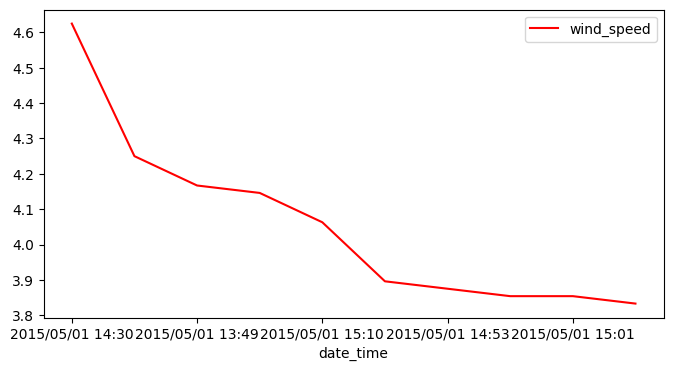

In [6]:
# Количество уникальных значений столбца relative_humidity
print(f"Количество уникальных значений относительной влажности': {new_df['humidity'].nunique()}")
# 10 максимальных значений скорости ветра 
top_speed_max10 = new_df[["date_time","wind_speed"]].nlargest(10, 'wind_speed')
print(f'ТОП10 скоростей ветра:')
print(top_speed_max10)
# Вывод графика
top_speed_max10.set_index('date_time', inplace=True) # делаем date_time индексом
top_speed_max10.plot(figsize=(8, 4), color='red')